In [61]:
# Loading necessary modules.
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from os import fspath
%matplotlib inline
import seaborn as sns
import math
import pandas as pd

In [2]:
import MDAnalysis as mda
mda.__version__

'2.7.0'

In [3]:
import nglview

In [40]:
from MDAnalysis.analysis.align import AlignTraj
from MDAnalysis.analysis.rms import RMSD, RMSF
from MDAnalysis.analysis.pca import PCA, cosine_content

In [5]:
data_path = "../../data/01_raw/02_NPT/01_npt_1/"
proc_path = "../../data/02_processed/02_prod/"
config_file = data_path + "step5_production.gro"
rawtraj_file = data_path + "step5_production.xtc"
prctraj_file = proc_path + 'step5_production_aligned_lastframe.xtc'

rec_traj = mda.Universe(config_file, rawtraj_file)

rec_ref = mda.Universe(config_file, rawtraj_file)
rec_ref.trajectory[-1]

sel = 'name CA'

aligner = AlignTraj(rec_traj,rec_ref,select=sel,filename = prctraj_file)
aligner.run()

In [6]:
rec_alignd = mda.Universe(config_file, prctraj_file)

rec_alignd_ref = mda.Universe(config_file, prctraj_file)
rec_alignd_ref.trajectory[-1]

/home/giacomo/micromamba/envs/QCB/lib/python3.12/site-packages/MDAnalysis/coordinates/XDR.py:240: UserWarning: Reload offsets from trajectory
 ctime or size or n_atoms did not match
  warnings.warn("Reload offsets from trajectory\n "


< Timestep 240 with unit cell dimensions [71.01997 71.01997 71.01997 90.      90.      90.     ] >

In [10]:
view = nglview.show_mdanalysis(rec_alignd)
view

NGLWidget(max_frame=240)

In [24]:
R = RMSD(rec_alignd, rec_alignd_ref, select=sel).run()

Text(0, 0.5, 'rmsd')

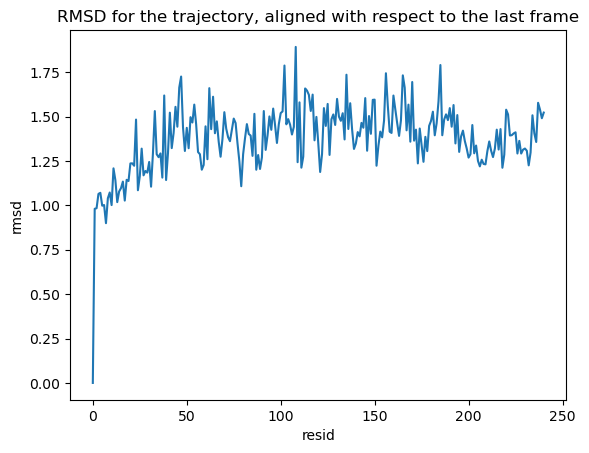

In [31]:
plt.title("RMSD for the trajectory, aligned with respect to the last frame")
plt.plot(R.results.rmsd[:, 0], R.results.rmsd[:, 2])
plt.xlabel("resid")
plt.ylabel("rmsd")

In [37]:
Rf = RMSF(rec_alignd.select_atoms(sel)).run()

Text(0, 0.5, 'RMSF')

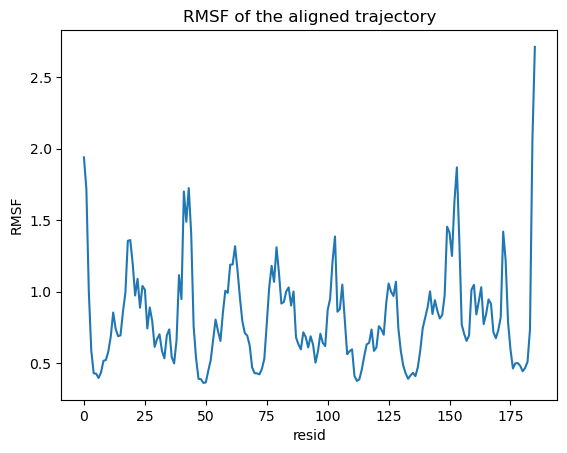

In [38]:
plt.title("RMSF of the aligned trajectory")
plt.plot(Rf.results.rmsf)
plt.xlabel("resid")
plt.ylabel("RMSF")

In [41]:
rec_pca = PCA(rec_alignd, select=sel)
rec_pca.run()
rec_pca_na = PCA(rec_traj, select=sel)
rec_pca_na.run()

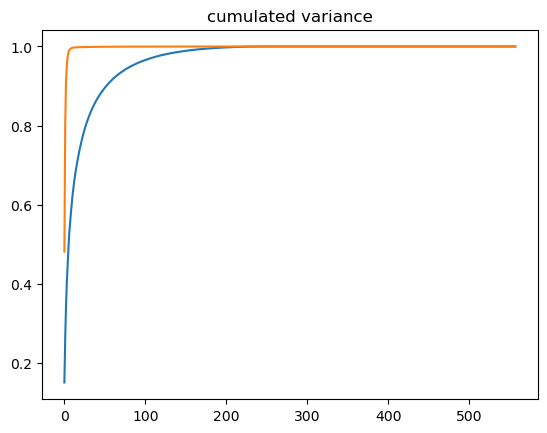

In [43]:
plt.title("cumulated variance")
plt.plot(rec_pca.results.cumulated_variance)
plt.plot(rec_pca_na.results.cumulated_variance)

In [54]:
print(rec_pca.results.cumulated_variance[2])

0.3431625578843277


In [55]:
pca_space = rec_pca.transform(rec_alignd.select_atoms(sel), 2)

In [66]:
pca_data = pd.DataFrame(pca_space,columns=['first_comp','second_comp'])
pca_data["group"] = pca_data.index // 40
pca_data

,first_comp,second_comp,group
0,-6.277501,-8.809994,0
1,-7.782982,-8.864843,0
2,-7.927692,-11.373460,0
3,-11.226393,-10.542200,0
4,-7.986587,-11.286978,0
...,...,...,...
236,-4.824111,3.183212,5
237,-2.260255,6.776636,5
238,-4.103694,4.217805,5
239,-1.729153,4.666296,5


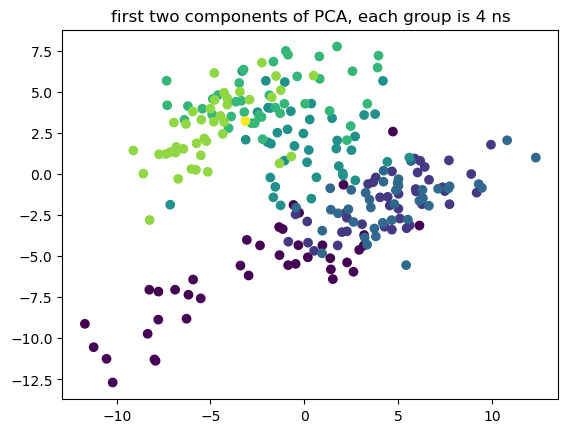

In [68]:
plt.title("first two components of PCA, each group is 4 ns")
plt.scatter(pca_data["first_comp"], pca_data["second_comp"], c= pca_data["group"])